In [236]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [237]:
sns.set_theme()

In [238]:
housing = pd.read_csv('housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [239]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [240]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [241]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


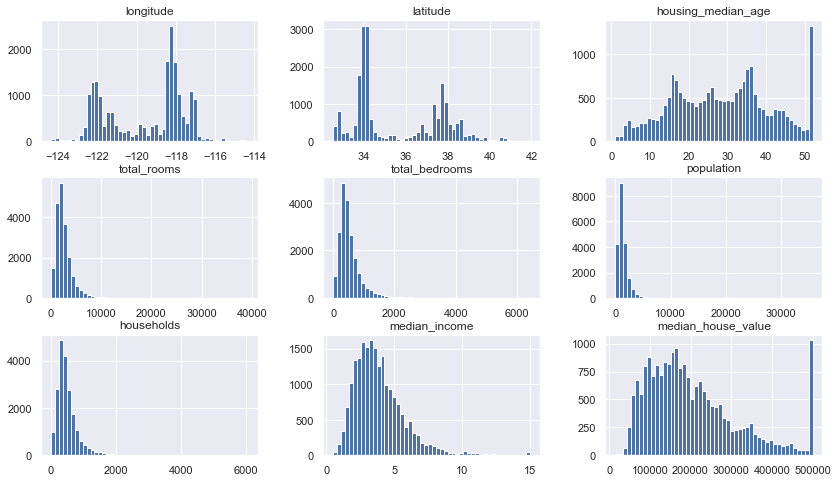

In [242]:
housing.hist(bins=50 , figsize=(14,8))
plt.show()

In [243]:
housing['income_category'] = pd.cut(housing['median_income'] , bins=[0. , 1.5 , 3. , 4.5 , 6 , np.inf], labels=[1,2,3,4,5])

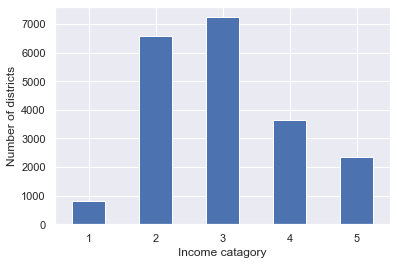

In [244]:
housing['income_category'].value_counts().sort_index().plot.bar(rot = 0 , grid = True)
plt.xlabel('Income catagory')
plt.ylabel('Number of districts')
plt.show()

In [245]:
from sklearn.model_selection import StratifiedShuffleSplit ,train_test_split
spliter = StratifiedShuffleSplit(n_splits=10 , test_size=.2 , random_state=42)
split_data = []
for train_index , test_index in spliter.split(housing ,housing['income_category']) :
    train_set_n = housing.iloc[train_index]
    test_set_n = housing.iloc[test_index]
    split_data.append([train_set_n , test_set_n])

train_set_n , test_set_n = split_data[0]


In [246]:
train_set_n.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [247]:
test_set_n.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3


In [248]:
start_train_set, start_test_set = train_test_split(housing , test_size=.2 , stratify=housing['income_category'] , random_state=42)

In [249]:
start_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


In [250]:
start_test_set['income_category'].value_counts() / len(start_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [251]:
for set_ in (start_train_set , start_test_set):
    set_.drop('income_category' , axis = 1 , inplace = True)

In [252]:
housing = start_train_set.copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


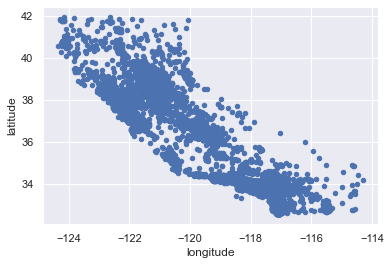

In [253]:
housing.plot(kind = 'scatter' , x= 'longitude' , y = 'latitude' , grid = True )
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


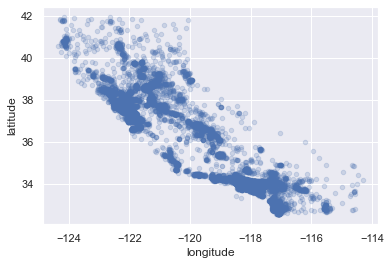

In [254]:
housing.plot(kind = 'scatter' , x= 'longitude' , y = 'latitude' , grid = True  , alpha = .2)
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

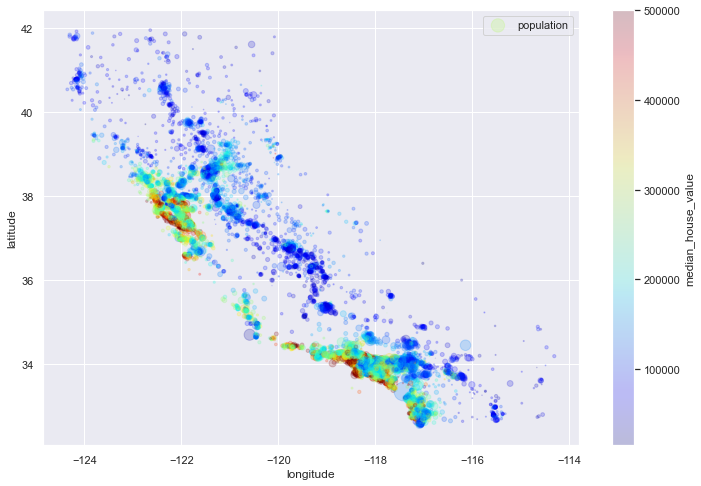

In [255]:
housing.plot(kind = 'scatter' , x= 'longitude' , y = 'latitude' , grid = True  , alpha = .2 , 
            s= housing['population']/100 , label = 'population' , c = 'median_house_value', cmap = 'jet',
            colorbar=True, legend = True , sharex = False , figsize =(12,8) )

In [256]:
corr_matrix = housing.corr()

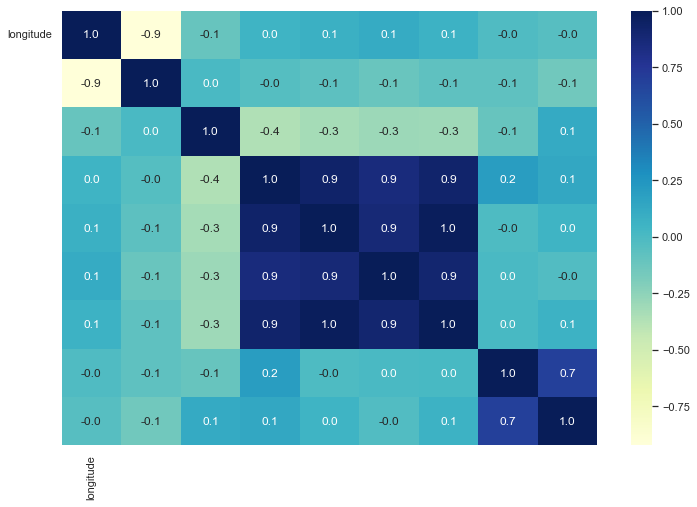

In [257]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix , annot=True ,cmap='YlGnBu' , fmt=".1f", ).set_figure(fig)

In [258]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

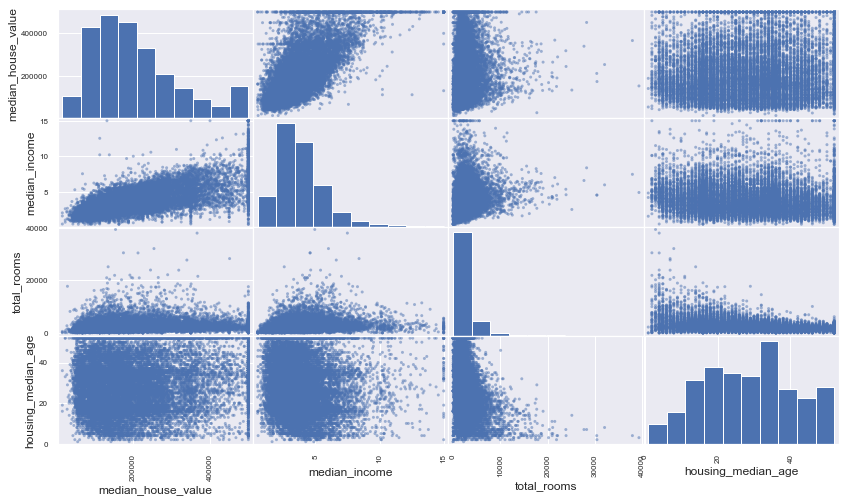

In [259]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms' , 'housing_median_age']
scatter_matrix(housing[attributes],figsize=(14,8) ,)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

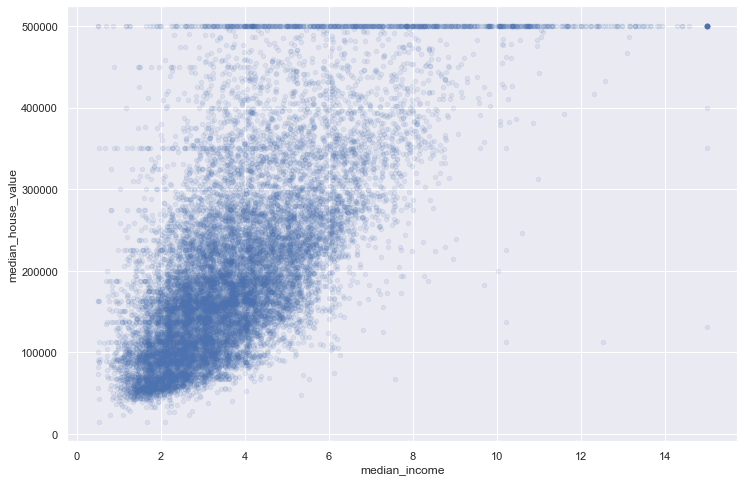

In [260]:
housing.plot(kind = 'scatter' , x= 'median_income' , y = 'median_house_value' , grid = True , alpha = .1, figsize = (12,8))

In [261]:
housing['room_per_house'] = housing['total_rooms']/housing['households']
housing['bedroom_ratio'] = housing['total_bedrooms']/housing['total_rooms']
housing['pepole_per_house'] = housing['population']/housing['households']


In [262]:
housing[['room_per_house' ,'bedroom_ratio','pepole_per_house' ]].head()

,room_per_house,bedroom_ratio,pepole_per_house
17606,4.625369,0.223852,2.094395
18632,6.008850,0.159057,2.707965
14650,4.225108,0.241291,2.025974
3230,5.232295,0.200866,4.135977
3555,4.505810,0.231341,3.047847


In [263]:
housing = start_train_set.drop('median_house_value' , axis=1)
housing_lable = start_train_set['median_house_value'].copy()
housing_lable

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [264]:
housing.dropna(subset=['total_bedrooms'], inplace=True)


In [265]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace = True)


In [266]:
housing['total_bedrooms']

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
          ...  
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Length: 16354, dtype: float64

In [267]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(strategy='median')

In [268]:
housing_num = housing.select_dtypes(include=[np.number])
Imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [269]:
Imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2120.    ,  433.    , 1164.    ,
        408.    ,    3.5439])

In [270]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2120.    ,  433.    , 1164.    ,
        408.    ,    3.5439])

In [271]:
X = Imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [272]:
housing_tr = pd.DataFrame(X , columns = housing_num.columns , index = housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


# Handelling Text and categorical attribute

In [273]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [274]:
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder

In [275]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoder = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoder[:8]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [276]:
cat_encoder = OneHotEncoder()
cat_encoder.fit_transform(housing_cat)
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [277]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16354x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16354 stored elements in Compressed Sparse Row format>

In [278]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [279]:
df_test = pd.DataFrame({'ocean_proximity':['INLAND','NEAR BAY']})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


In [280]:
cat_encoder.transform(df_test)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [281]:
df_test_unknown = pd.DataFrame({'ocean_proximity':['<1H OCEAN','ISLAND']})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<1H OCEAN,ocean_proximity_ISLAND
0,1,0
1,0,1


In [282]:
cat_encoder.handle_unknown = 'ignore'
cat_encoder.transform(df_test_unknown)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

# Feature Scaling and Transformation

In [283]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max = min_max_scaler.fit_transform(housing_num)


In [284]:
housing_num_min_max

array([[-0.50996016,  0.00956429,  0.45098039, ..., -0.96036884,
        -0.87415982, -0.69596281],
       [-0.51792829, -0.04144527, -0.49019608, ..., -0.98301522,
        -0.95855116, -0.18325264],
       [ 0.42430279, -0.95111583,  0.17647059, ..., -0.94770033,
        -0.82823002, -0.6741838 ],
       ...,
       [ 0.58366534, -0.67056323, -0.68627451, ..., -0.88256397,
        -0.71508588, -0.61760527],
       [ 0.26294821, -0.72794899,  0.17647059, ..., -0.92415707,
        -0.8678118 , -0.50861367],
       [-0.62151394,  0.11158342,  1.        , ..., -0.92903389,
        -0.76213592, -0.57585413]])

In [285]:
from sklearn.preprocessing import StandardScaler 
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)


In [286]:
housing_num_std_scaled

array([[-1.1562985 ,  0.77198428,  0.74387575, ..., -0.63554613,
        -0.42079982, -0.61579586],
       [-1.17628181,  0.65973958, -1.16381502, ..., -0.99760977,
        -1.02270615,  1.33604608],
       [ 1.18674452, -1.3419575 ,  0.18746594, ..., -0.43300558,
        -0.09321363, -0.53288511],
       ...,
       [ 1.5864107 , -0.72461167, -1.5612506 , ...,  0.60837548,
         0.71376699, -0.31749569],
       [ 0.7820825 , -0.85088695,  0.18746594, ..., -0.05660279,
        -0.37552368,  0.09742563],
       [-1.43606483,  0.99647367,  1.85669537, ..., -0.13457194,
         0.37819089, -0.15855278]])

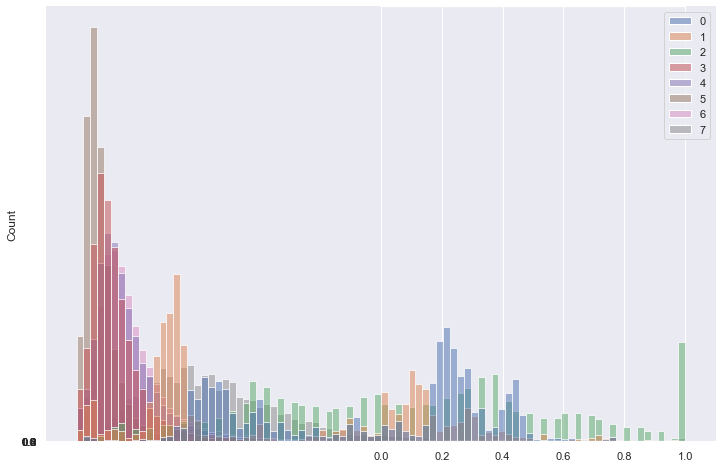

In [287]:
fig = plt.figure(figsize=(12,8))

sns.histplot(housing_num_min_max).set_figure(fig)

In [288]:
from sklearn.linear_model import LinearRegression
traget_scaler = StandardScaler()
scaled_label = traget_scaler.fit_transform(housing_lable.to_frame())

In [289]:
scaled_label

array([[ 0.68806755],
       [ 1.15479381],
       [-0.08721662],
       ...,
       [-0.94374574],
       [ 0.16343266],
       [ 2.53250922]])

In [290]:
scaled_label.shape

(16512, 1)

In [291]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [292]:
housing.shape

(16354, 9)

In [293]:
linear_model = LinearRegression()
linear_model.fit(start_train_set[['median_income']] , scaled_label)
some_new_data = housing[['median_income']].iloc[:5]

In [294]:
prediction = linear_model.predict(some_new_data)
prediction

array([[-0.42256041],
       [ 0.91836141],
       [-0.36560045],
       [-0.71847082],
       [-0.3033377 ]])

In [295]:
prediction = traget_scaler.inverse_transform(prediction)

In [296]:
prediction

array([[158100.88788757],
       [313244.88649529],
       [164691.12714835],
       [123864.19842832],
       [171894.89723328]])

# clustring the housing latitude and longitude 

In [297]:
from sklearn.cluster import KMeans

n_cluster = 10 

kmean = KMeans(n_clusters=n_cluster, random_state = 42 )